In [1]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import load_model
import tensorflow as tf
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import plot_model
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
def mIoU(labels,predictions):
    pred_x1=predictions[:,0]
    pred_x2=predictions[:,1]
    pred_y1=predictions[:,2]
    pred_y2=predictions[:,3]
    label_x1=labels[:,0]
    label_x2=labels[:,1]
    label_y1=labels[:,2]
    label_y2=labels[:,3]
    int_x1 = tf.maximum(pred_x1, label_x1)
    int_x2 = tf.minimum(pred_x2, label_x2)
    int_y1 = tf.maximum(pred_y1, label_y1)
    int_y2 = tf.minimum(pred_y2, label_y2)
    tensor_type = pred_x1.dtype
    pred_area = tf.multiply(tf.maximum(tf.cast(0.0, tensor_type), pred_x2 - pred_x1), tf.maximum(tf.cast(0.0, tensor_type), pred_y2 - pred_y1))
    label_area = tf.multiply(tf.maximum(tf.cast(0.0, tensor_type), label_x2 - label_x1), tf.maximum(tf.cast(0.0, tensor_type), label_y2 - label_y1))
    int_area = tf.multiply(tf.maximum(tf.cast(0.0, tensor_type), int_x2 - int_x1), tf.maximum(tf.cast(0.0, tensor_type), int_y2 - int_y1))
    union_area = pred_area + label_area - int_area
    IoU = int_area / union_area
    return tf.reduce_mean(IoU)

In [4]:
orig_img_dir = 'X:/Flipkart GRID - Object Localization (Medium Complexity Round)/orig_data/data/images'
base_dir = 'X:/Flipkart GRID - Object Localization (Medium Complexity Round)'
test_df_dir = 'X:/Flipkart GRID - Object Localization (Medium Complexity Round)/orig_data/test_s3.csv'
test_df = pd.read_csv(test_df_dir)
chkpt_dir = 'X:/Flipkart GRID - Object Localization (Medium Complexity Round)/chkpts'
s3_img_dir = 'X:/Flipkart GRID - Object Localization (Medium Complexity Round)/data_s3'

In [5]:
print(len(test_df))
test_df.head()

24045


,image_name,x1,x2,y1,y2
0,1467891670691DSC_0582.png,NaN,NaN,NaN,NaN
1,1475151786691DSC00560.png,NaN,NaN,NaN,NaN
2,1480334114405_R2A3620.png,NaN,NaN,NaN,NaN
3,JPEG_20160712_161047_1000606860114.png,NaN,NaN,NaN,NaN
4,JPEG_20160403_174522_-1137349501.png,NaN,NaN,NaN,NaN


In [6]:
xception_95_val_lrf = 'xception_lrf_trained_val95.h5'
xception_lrf_submission = 'xception_lrf_training_s3_data_augmentation.h5'
irv2_lrf = 'inceptionresnetv2_lrf_submission.h5'
model = load_model(os.path.join(chkpt_dir, xception_lrf_submission), custom_objects={'mIoU': mIoU})

In [7]:
df = test_df.copy()
df.drop(['x1', 'x2', 'y1', 'y2'], axis = 1, inplace = True)
df.head()

,image_name
0,1467891670691DSC_0582.png
1,1475151786691DSC00560.png
2,1480334114405_R2A3620.png
3,JPEG_20160712_161047_1000606860114.png
4,JPEG_20160403_174522_-1137349501.png


In [8]:
# test_datagen = ImageDataGenerator(rescale=1./255)

# test_generator=test_datagen.flow_from_dataframe(dataframe=df, directory=s3_img_dir, x_col='image_name', y_col = [], class_mode="other", target_size = (299, 299), batch_size=1, shuffle = False)

# filenames = test_generator.filenames
# nb_samples = len(filenames)

# print(len(filenames))

# predict = model.predict_generator(test_generator,steps = nb_samples, verbose = True)

In [9]:
ctr = 0
rx = 2.1404
ry = 1.61

In [10]:
# idx = 1234
# img = cv2.imread(os.path.join(s3_img_dir, df.image_name.iloc[idx]))
# cv2.rectangle(img, (int(predict[idx][0]), int(predict[idx][2])), (int(predict[idx][1]), int(predict[idx][3])), 3)
# print((predict[idx][0], predict[idx][2]), (predict[idx][1], predict[idx][3]))
# plt.figure(ctr)
# ctr += 1
# print(df.at[idx, 'image_name'])
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

100%|████████████████████████████████████████████████████████████████████████████| 24045/24045 [09:53<00:00, 40.36it/s]


(75.859146, 86.908745) (548.06824, 419.18646)
1467891670691DSC_0582.png
(162.23888, 0.0) (431.00662, 476.13547)
JPEG_20160526_153210_1000893254759.png
(255.9118, 79.836754) (405.64304, 376.39905)
JPEG_20160704_155143_1000650370289.png
(123.69134, 117.649086) (549.6608, 366.50705)
JPEG_20161126_185256_1000569019249.png
(257.74948, 57.97357) (467.86078, 442.02234)
JPEG_20160518_091519_1000349810889.png
(119.40738, 9.355612) (505.86404, 467.13016)
1474633927049DSC06154.png
(40.16481, 7.7361712) (587.59045, 425.43286)
1474638184879DSC06376.png
(28.369337, 120.01388) (608.98413, 349.00327)
1480179962729Kraus22-11-1613216.png
(154.32872, 126.1174) (426.65475, 419.71606)
1471937235222DSC_0134.png
(35.262463, 108.83436) (490.21054, 326.3783)
JPEG_20161205_154729_1000466690121.png
(29.882084, 115.5274) (621.2169, 386.24945)
1475008599472DSC019781.png
(127.61238, 11.473341) (501.47253, 458.7793)
1476882596379Untitled1.png
(73.732315, 47.58896) (442.34128, 366.59213)
1480510564382IMG_0279.png
(51

C:\Users\praty\Anaconda3\envs\dlenv\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


147185789467320160819_115734.png
(114.29367, 243.56818) (500.44727, 300.47495)
JPEG_20161123_182109_1000141417761.png
(211.26047, 19.342108) (412.30276, 413.8387)
1474639080809DSC06399.png
(187.20433, 25.978645) (462.7197, 406.97824)
1470125744471DSC_0075.png
(238.40182, 0.0) (450.53134, 478.46277)
147339964682659891_XXX_v3.png


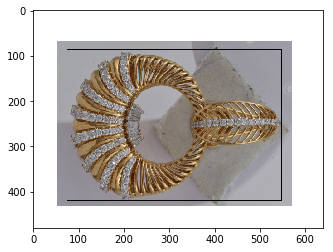

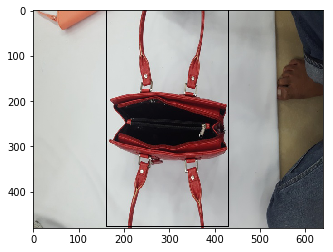

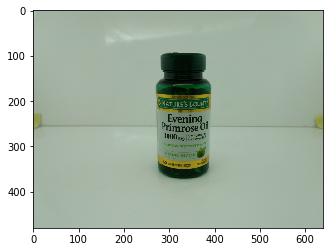

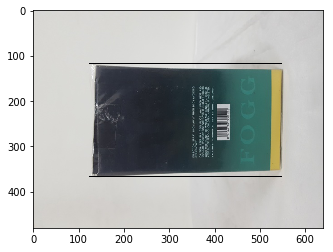

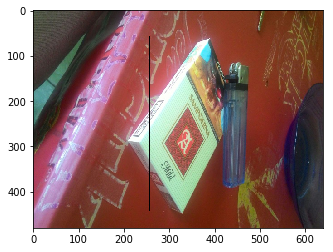

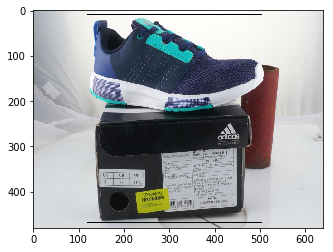

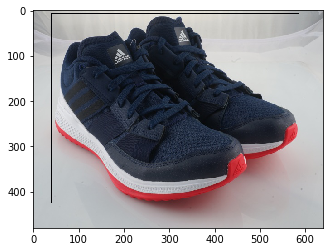

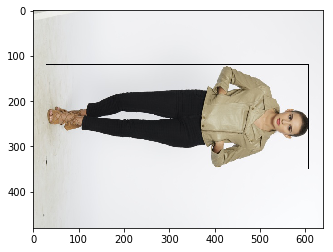

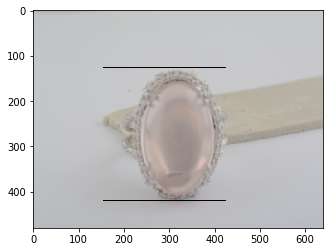

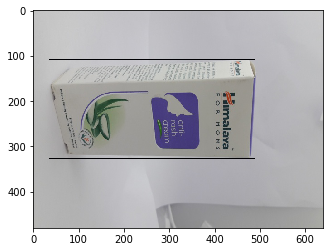

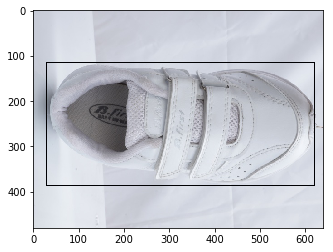

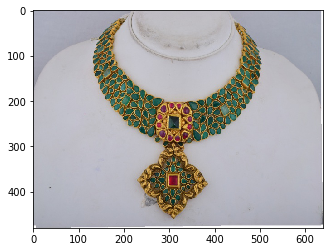

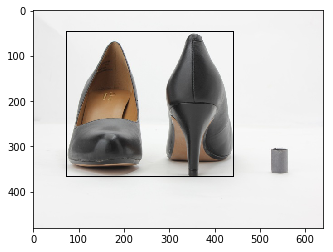

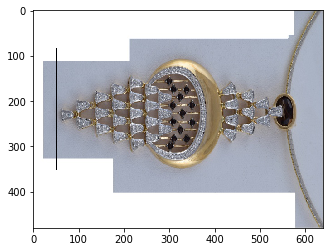

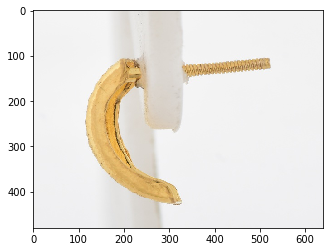

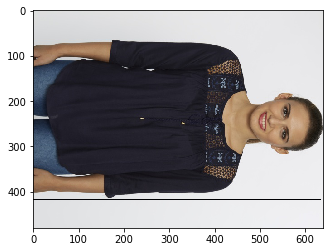

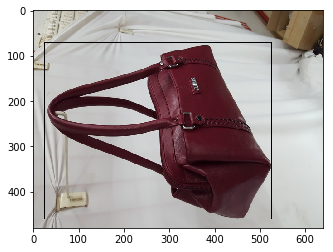

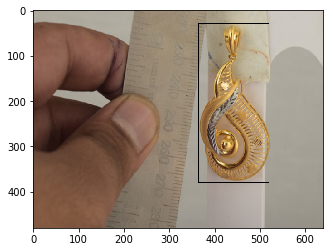

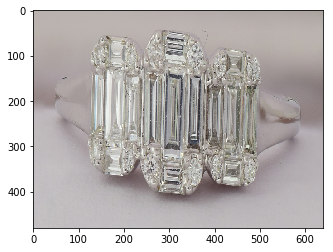

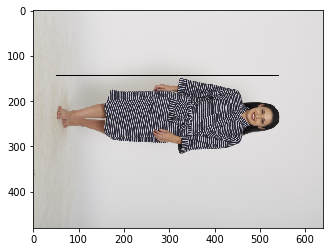

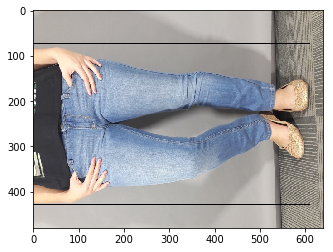

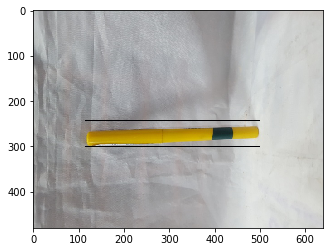

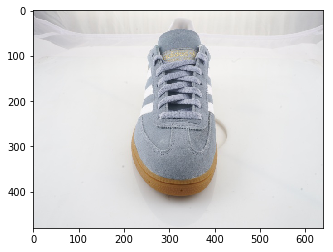

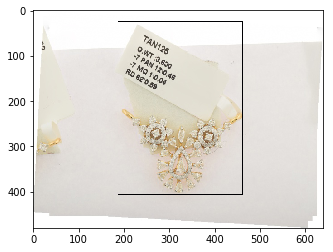

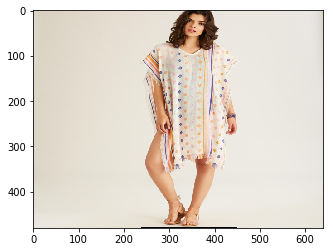

In [11]:
rx = 2.1404
ry = 1.61
ctr = 0
""" UNCOMMNENT BELOW TO GENERATE PREDICTIONS """
preds = []
im_list = []
for im in tqdm(test_df.image_name):
    img = cv2.imread(os.path.join(s3_img_dir, im))
    img = cv2.resize(img, (299, 299))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    preds.append(pred)
    im_list.append(im)
for j, pred in enumerate(preds):
    test_df.at[j, 'x1'] = int(pred[0][0])
    test_df.at[j, 'x2'] = int(pred[0][1])
    test_df.at[j, 'y1'] = int(pred[0][2])
    test_df.at[j, 'y2'] = int(pred[0][3])
    assert(im_list[j] == test_df.at[j, 'image_name'])
    if(j%1000 == 0):
        img = cv2.imread(os.path.join(s3_img_dir, im_list[j]))
        cv2.rectangle(img, (int(pred[0][0]), int(pred[0][2])), (int(pred[0][1]), int(pred[0][3])), 3)
        print((pred[0][0], pred[0][2]), (pred[0][1], pred[0][3]))
        plt.figure(ctr)
        ctr += 1
        print(test_df.at[j, 'image_name'])
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [ ]:
# print(type(filenames))
# print(predict.shape)
# print(predict[0])

In [ ]:
# for j, pred in enumerate(tqdm(predict)):
#     test_df.at[j, 'x1'] = int(predict[j][0])
#     test_df.at[j, 'x2'] = int(predict[j][1])
#     test_df.at[j, 'y1'] = int(predict[j][2])
#     test_df.at[j, 'y2'] = int(predict[j][3])
#     if(j==101 or j == 567 or j == 534 or j == 5647 or j == 24000):
#         cv2.rectangle(img, (int(pred[0][0] / rx), int(pred[0][2] / ry)), (int(pred[0][1] / rx), int(pred[0][3]/ ry)), 3)
#         print((pred[0][0]  / rx, pred[0][2]  / ry), (pred[0][1]  / rx, pred[0][3]  / ry))
#         plt.figure(ctr)
#         ctr += 1
#         print(test_df.at[j, 'image_name'])
#         plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [12]:
test_df.to_csv(os.path.join('X:/Flipkart GRID - Object Localization (Medium Complexity Round)/submission_s3', 'submission_x_s3_8.csv'), index = False)

In [ ]:
# for ctr, im in enumerate(test_df.image_name):
#     img = cv2.imread(os.path.join(img_data_path, im))
#     x1, x2, y1, y2 = get_bbox(img, 1200)
#     a1, a2, b1, b2 = get_bbox(img, 2000)
#     assert(x1 == a1)
#     test_df.at[ctr, 'x1'] = int((x1 + a1) / 2)
#     test_df.at[ctr, 'x2'] = int((x2 + a2) / 2)
#     test_df.at[ctr, 'y1'] = int((y1 + b1) / 2)
#     test_df.at[ctr, 'y2'] = int((y2 + b2) / 2)
#     if ctr % 1000 == 0:
#         cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),2);
#         plt.figure(ctr//1000)
#         print(im)
#         plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# test_df.to_csv(os.path.join('X:/Flipkart GRID - Object Localization (Medium Complexity Round)/orig_data', 'submission_7.csv'), index = False)